In [2]:
import sys

print(sys.version)

3.7.10 (default, Feb 26 2021, 13:06:18) [MSC v.1916 64 bit (AMD64)]


# 1. 제너레이터  만들기

- PEP 255 Simple Generator

## 제너레이터 함수 정의

- 제너레이터의 특징은 호출핼 때마다 실행한다.
-  즉 호출할 때마다 yield를 만나면 실행결과를 반환한다. 

###  하나의 제너레이터를 함수로 만든다

In [10]:
def make_gen():
    yield 1
    yield 2 
    yield 3

### 이 제너레이터 함수를 실행하면 제너레이터 객체가 만들어진다.

In [11]:
gen = make_gen()

In [12]:
gen

<generator object make_gen at 0x7fad98ae42d0>

### 모든 제너레이터는 반복자이다

In [13]:
from collections.abc import Iterator

In [14]:
isinstance(gen, Iterator)

True

In [15]:
next(gen), next(gen),next(gen)

(1, 2, 3)

### 한번 다 실행하면 더 이상 사용할 수 없다.

In [16]:
next(gen)

StopIteration: 

## 반복적으로 제너레이터 호출
- 내부에 순환문을 사용해서 반복할 수 있는 구조로 변환해야함

In [19]:
def make_gen(n):
    for i in range(1, n+1):
        yield i

In [20]:
gen = make_gen(3)

In [21]:
next(gen), next(gen), next(gen)

(1, 2, 3)

In [22]:
next(gen)

StopIteration: 

## 제너레이터 작동 방법 알아보기

In [47]:
def make_gen():
    print("1 번째 호출 ")
    s = 10 + 10
    yield s
    print('2 번째 호출 ')
    s = 10 - 5
    yield s
    print('3 번째 호출 ')
    s = 9 // 3
    yield s
    print('4 번째 호출 ')
    s = 40 // 5
    yield s

In [48]:
gen = make_gen() # 제너레이터 생성

In [49]:
next(gen)

1 번째 호출 


20

In [50]:
next(gen)

2 번째 호출 


5

In [51]:
next(gen)

3 번째 호출 


3

In [52]:
next(gen)

4 번째 호출 


8

In [82]:
def make_gen(s):
    for i in range(0 ,s+1):
        print(f"{i} 번째 호출")
        y = i+1
        s = s+1
        yield 

In [83]:
next(make_gen(5))

0 번째 호출


In [ ]:
lol = [1,2,3]

In [ ]:
def flatten(lol) :
    for item in lol :
        if isinstance(item, list) :
            for subitem in flatten(item) :
                yield subitem
        else :
            yield item

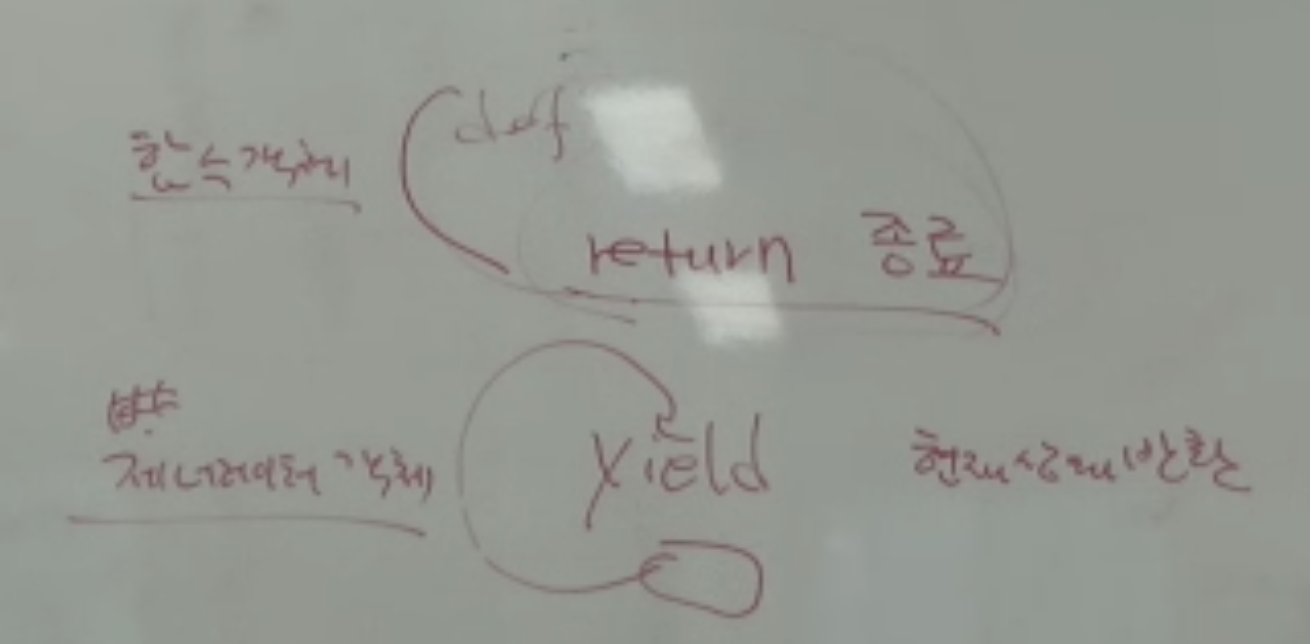

- def ~ return : 함수 객체 생성
- def ~ yield : 제너레이터 객체 생성
- 함수 객체와 제너레이터 객체는 전혀 다르다.

## 제너레이터로 재귀함수 처리하기



In [100]:
lol =[1,2,[3,4,5],[6,[7,[8,9]]]]

In [101]:
def flatten(lol) :
    for item in lol :
        if isinstance(item, list) :
            for subitem in flatten(item) :
                yield subitem
        else :
            yield item

In [102]:
flatten(lol)

<generator object flatten at 0x7fd6b634d820>

In [103]:
list(flatten(lol))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [106]:
def flatten_(lol) :
    for item in lol :
        if isinstance(item, list) :
            # 반복적인 일을 만났을 때 from으로 반복형을 없앤다.
            yield from flatten_(item) 
        else :
            yield item

In [107]:
list(flatten_(lol))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

# generator 대기하는 특성

yield가 하나 있는 함수

yield가 있는 부분을 특정 코드로 대체해서 실행시키기


예)

```
def some_generator():
    <code 1>
    yield
    <code 2>
```

+

```
<code A>
```

=

```
<code 1>
<code A>
<code 2>
```

+ with context

## 제너레이터를 처리하는 컨텍스트 매니저 클래스 정의

- __enter__, __exit__ 스페셜 메소드를 정의하면 컨텍스트 매니저를 만든다.


In [17]:
class GeneratorContextManager:
    def __init__(self, gen):
        self.gen = gen
        
    def __enter__(self):                                     # 
        try:
            return next(self.gen)
        except StopIteration:
            raise RuntimeError
            
    def __exit__(self, error_type, error_value, traceback):
        if error_type is None:
            try:
                next(self.gen)
            except StopIteration:
                pass
            else:
                raise RuntimeError
        else:
            self.gen.throw(error_type, error_value, traceback)
            
            

### 제너레이터를 컨택스트 메니저로 생성함수 정의

In [18]:
def mycontextmanager(func):# < func 는 제너레이터 생성함수
    def inner(*args, **kwargs):
        return GeneratorContextManager(func(*args, **kwargs))
    return inner

### 제너레이터 함수에 데코레이팅 처리

In [19]:
@mycontextmanager
def tag(tag_name):
    print("<{}>".format(tag_name)) # <code 1>
    yield
    print("</{}>".format(tag_name)) # <code 2>

### with 구문으로 컨텍스트 매니저 처리 

In [20]:
with tag('div'):
    print('Hello World!') 

<div>
Hello World!
</div>


In [21]:
@mycontextmanager
def print_a():
    try:
        print(a)
    except NameError:
        print("a는 없습니다.")
    yield
    print("a의 값은 : ", a)


In [22]:
with print_a():
    a = 12

a는 없습니다.
a의 값은 :  12


## 컨텍스트 매니저 모듈을 사용해서 처리하기

In [23]:
from contextlib import contextmanager

In [24]:
@contextmanager
def tag(tag_name):
    print("<{}>".format(tag_name)) # <code 1>
    yield
    print("</{}>".format(tag_name)) # <code 2>

In [25]:
with tag('div'):
    print('Hello World!') # <code A>

<div>
Hello World!
</div>


## 실습 : fib 수열을 구하는 제너레이터

`1, 1, 2, 3, 5, 8, 13, ...`

In [26]:
def make_fib():
    a = 0
    b = 1
    while True:
        yield b
        a, b = b, a + b

In [27]:
fib = make_fib()

In [28]:
next(fib), next(fib), next(fib), next(fib), next(fib)

(1, 1, 2, 3, 5)

# 2. 제너레이터의 단점을 보완하는 방법

연속된 값들을 처리할때 제약

## 제너레이터는 slice 불가

In [29]:
def numbers():
    for i in range(10):
        yield i

In [30]:
gen = numbers()

In [31]:
list(gen)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [32]:
gen[:3]

TypeError: 'generator' object is not subscriptable

### 별도의 모듈을 사용해서 처리해야 함

In [33]:
from itertools import islice

In [34]:
gen = numbers()

result = islice(gen, 3) 

In [35]:
list(result)

[0, 1, 2]

## 제너레이터는 chain, + 연산 불가

In [36]:
def a():
    for i in range(3):
        yield i
        
gen = a()

In [37]:
gen + [3, 4, 5]

TypeError: unsupported operand type(s) for +: 'generator' and 'list'

In [38]:
gen + gen

TypeError: unsupported operand type(s) for +: 'generator' and 'generator'

### 별도의 모듈을 이용해서 체인화

In [39]:
from itertools import chain

In [40]:
gen = a()

it = chain(gen, [3, 4, 5])

In [41]:
list(it)

[0, 1, 2, 3, 4, 5]

## 제너레이터 (이터레이터)는 계속 반복 불가

In [42]:
def a():
    for i in range(3):
        yield i

In [43]:
gen = a()

In [44]:
next(gen), next(gen), next(gen)

(0, 1, 2)

In [45]:
next(gen), next(gen), next(gen)

StopIteration: 

### 다른 모듈로 연속 처리

In [46]:
from itertools import cycle

In [47]:
gen = a() # 0, 1, 2

In [48]:
it = cycle(gen) # 0, 1, 2, 0, 1, 2, 0, 1, 2, ...

In [49]:
next(it), next(it), next(it)

(0, 1, 2)

In [50]:
next(it), next(it), next(it)

(0, 1, 2)

## 제너레이터 연결하기 : yield from

In [51]:
def subgenerator():
    for i in range(5):
        yield i
        
def maingen():
    for j in subgenerator():
        yield j

In [52]:
c = maingen()

In [53]:
c

<generator object maingen at 0x000002077E4A1A48>

In [54]:
list(c)

[0, 1, 2, 3, 4]

In [55]:
def subgenerator():
    yield from range(5)
        
def maingen():
    yield from subgenerator()

In [56]:
c = maingen()

In [57]:
list(c)

[0, 1, 2, 3, 4]

In [58]:
def maingen():
    yield from '1234'
    yield from (1, 2, 3, 4)

In [59]:
gen = maingen()

In [60]:
list(gen)

['1', '2', '3', '4', 1, 2, 3, 4]